In [3]:
pip install yfinance

  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
     ---------------------------------------- 0.0/949.2 kB ? eta -:--:--
     -------------------------------------- 949.2/949.2 kB 8.8 MB/s eta 0:00:00
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'
   ---------------------------------------- 0.0/1.6 MB ? eta -:--:--
   ---------------------------------------- 1.6/1.6 MB 10.8 MB/s eta 0:00:00
  Created wheel for multitasking: filename=multitasking-0.0.12-py3-none-any.whl size=15617 sha256=4c189d63ba09a26c9d7ac449fc03f28f62dd49c7e9415e7ce53d2b347449dde7
  Stored in directory: c:\users\user\appdata\local\pip\cache\wheels\cc\bd\6f\664d62c99327abeef7d86489e6631

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf

In [5]:
# Get last 10 years of data
start = "2014-01-01"
end = "2024-12-30"

stock = "GOOG"

data = yf.download(stock, start , end)

C:\Users\user\AppData\Local\Temp\ipykernel_11628\959731145.py:7: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(stock, start , end)
[*********************100%***********************]  1 of 1 completed


In [6]:
data

Price,Close,High,Low,Open,Volume
Ticker,GOOG,GOOG,GOOG,GOOG,GOOG
Date,,,,,
2014-01-02,27.560261,27.674898,27.439930,27.618199,73129082
2014-01-03,27.359213,27.654593,27.357480,27.606808,66917888
2014-01-06,27.664251,27.702380,27.394868,27.557538,71037271
2014-01-07,28.197567,28.218119,27.759326,27.854402,102486711
2014-01-08,28.256248,28.407034,28.059657,28.374351,90036218
...,...,...,...,...,...
2024-12-20,192.509033,193.681275,185.934423,186.572927,45319700
2024-12-23,195.531952,196.030783,191.182141,193.576526,15235900


In [7]:
data.reset_index(inplace=True)

In [8]:
data

Price,Date,Close,High,Low,Open,Volume
Ticker,,GOOG,GOOG,GOOG,GOOG,GOOG
0,2014-01-02,27.560261,27.674898,27.439930,27.618199,73129082
1,2014-01-03,27.359213,27.654593,27.357480,27.606808,66917888
2,2014-01-06,27.664251,27.702380,27.394868,27.557538,71037271
3,2014-01-07,28.197567,28.218119,27.759326,27.854402,102486711
4,2014-01-08,28.256248,28.407034,28.059657,28.374351,90036218
...,...,...,...,...,...,...
2761,2024-12-20,192.509033,193.681275,185.934423,186.572927,45319700
2762,2024-12-23,195.531952,196.030783,191.182141,193.576526,15235900
2763,2024-12-24,197.108246,197.208003,194.741780,195.711509,6809800


In [9]:
# Moving averag of 100 days

ma_100_days = data.Close.rolling(100).mean()

In [14]:
# For the 100 first value , there is no 100 previous value so the mean is nan
ma_100_days

Ticker,GOOG
0,NaN
1,NaN
2,NaN
3,NaN
4,NaN
...,...
2761,168.898518
2762,169.137577
2763,169.432705
2764,169.800374


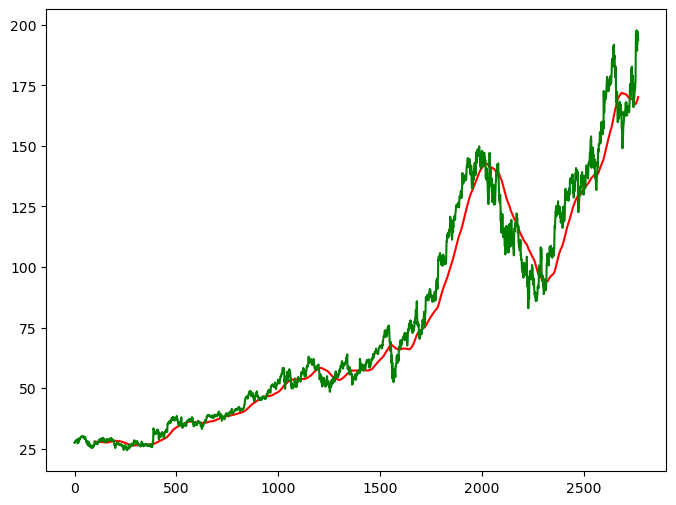

In [15]:
plt.figure(figsize=(8,6))
plt.plot(ma_100_days, 'r')
plt.plot(data.Close , 'g')
plt.show()

In [16]:
ma_200_days = data.Close.rolling(200).mean()

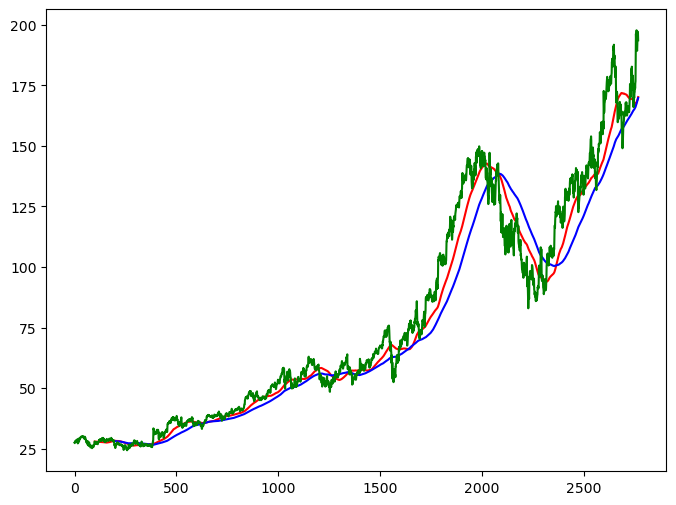

In [18]:
plt.figure(figsize=(8,6))
plt.plot(ma_100_days , 'r')
plt.plot(ma_200_days , 'b')
plt.plot(data.Close , 'g')
plt.show()



In [19]:
data.dropna(inplace=True)

In [20]:
# Spliting data
# The data of first 80% days for training and las 20% for testing
data_train = data.Close[0: int(len(data)*0.8)]
data_test = data.Close[int(len(data)*0.8) : ]

In [22]:
data_test

Ticker,GOOG
2212,96.605759
2213,100.184486
2214,100.790871
2215,99.697380
2216,99.935974
...,...
2761,192.509033
2762,195.531952
2763,197.108246
2764,196.639343


In [25]:
data_train.shape

(2212, 1)

In [26]:
data_test.shape

(554, 1)

In [27]:
# Scaling the data between 0 and 1
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))

In [28]:
data_train_scaled = scaler.fit_transform(data_train)

In [30]:
# Output → always a NumPy array, not a DataFrame, even if the input was a DataFrame.
data_train_scaled

array([[0.02508156],
       [0.02347835],
       [0.0259108 ],
       ...,
       [0.58256484],
       [0.58454667],
       [0.59572397]])

In [31]:
data_train_scaled.shape

(2212, 1)

In [32]:

x=[]
y=[]

# Taking the first 100 days data to calculate the next day data
# x will represent the feature that will determine the target y
# x : 100 close of 100 previous days
# y : 101'S day close
for i in range(100, data_train_scaled.shape[0]):
    x.append(data_train_scaled[i-100 : i])    
    y.append(data_train_scaled[i,0])

In [35]:
# Convert x and y from python arr to np array to use .shape
x,y = np.array(x) , np.array(y)

In [34]:
from keras.layers import Dense , Dropout , LSTM
from keras.models import Sequential


In [36]:
model = Sequential()
# input shape is (100,1)
# x shape is (train_data len ,100) 2d arr
model.add(LSTM(units = 50,activation="relu" , return_sequences = True,
              input_shape=((x.shape[1],1))))
model.add(Dropout(0.2))

model.add(LSTM(units=60 , activation="relu" , return_sequences = True))
model.add(Dropout(0.3)) 

model.add(LSTM(units = 80,activation="relu" , return_sequences = True))
model.add(Dropout(0.4))

model.add(LSTM(units = 120 ,activation = "relu"))
model.add(Dropout(0.5))

model.add(Dense(units= 1))


C:\Users\user\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [37]:
model.compile(optimizer= 'adam' , loss = 'mean_squared_error')

In [38]:
model.fit(x,y , epochs = 50 ,batch_size = 32 , verbose=1)

Epoch 1/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 19s 161ms/step - loss: 0.0719
Epoch 2/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 12s 178ms/step - loss: 0.0076
Epoch 3/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 13s 199ms/step - loss: 0.0061
Epoch 4/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 11s 168ms/step - loss: 0.0076
Epoch 5/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 10s 157ms/step - loss: 0.0053
Epoch 6/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 10s 156ms/step - loss: 0.0054
Epoch 7/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 10s 158ms/step - loss: 0.0043
Epoch 8/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 10s 155ms/step - loss: 0.0048
Epoch 9/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 10s 156ms/step - loss: 0.0042
Epoch 10/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 10s 155ms/step - loss: 0.0044
Epoch 11/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 10s 156ms/step - loss: 0.0044
Epoch 12/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 12s 177ms/step - loss: 0.0049
Epoch 13/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 11s 168ms/step - loss: 0.0045
Epoch 14/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 10s 157ms/step - loss: 0.0039
Epoch 15/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 11s 

In [39]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 100, 50)        │        10,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 100, 50)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 100, 60)        │        26,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 100, 60)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_2 (LSTM)                   │ (None, 100, 80)        │        45,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 100, 80)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_3 (LSTM)                   │ (None, 120)            │        96,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 120)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │           121 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 536,285 (2.05 MB)

 Trainable params: 178,761 (698.29 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 357,524 (1.36 MB)

In [41]:
# we need to add the past 100 data from train data to test data 
# so we find the feature x for first target y in the test data
past_100_days = data_train.tail(100)

In [42]:
data_test = pd.concat([past_100_days, data_test] , ignore_index=True)

In [43]:
data_test

Ticker,GOOG
0,111.006653
1,105.300079
2,105.214096
3,107.656075
4,112.132477
...,...
649,192.509033
650,195.531952
651,197.108246
652,196.639343


In [69]:
data_test.shape

(654, 1)

In [44]:
data_test_scaled = scaler.fit_transform(data_test)

In [60]:
X = []
y = []

for i in range(100, data_test_scaled.shape[0]):
    X.append(data_test_scaled[i-100:i])
    y.append(data_test_scaled[i,0])

# convert from python arr to np arr for predecting
X , y = np.array(X) , np.array(y)

In [57]:
y_predict = model.predict(X)

18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 61ms/step


In [58]:
y_predict

array([[0.17487013],
       [0.17205465],
       [0.16954482],
       [0.1673368 ],
       [0.16542926],
       [0.16382319],
       [0.1625295 ],
       [0.16157515],
       [0.16099378],
       [0.16074419],
       [0.16072372],
       [0.16081512],
       [0.16088888],
       [0.16079038],
       [0.16033477],
       [0.15931189],
       [0.15754732],
       [0.15493691],
       [0.15145344],
       [0.14712864],
       [0.14213297],
       [0.1367445 ],
       [0.13129058],
       [0.12612069],
       [0.12154646],
       [0.11778664],
       [0.1149618 ],
       [0.1130999 ],
       [0.11217822],
       [0.11214627],
       [0.1129245 ],
       [0.11439265],
       [0.11639274],
       [0.11880075],
       [0.12152375],
       [0.12448709],
       [0.12761986],
       [0.13083035],
       [0.1340012 ],
       [0.13699582],
       [0.13966867],
       [0.14188305],
       [0.14353932],
       [0.14457493],
       [0.14493838],
       [0.14459704],
       [0.14353165],
       [0.141

In [71]:
y_predict.shape

(554, 1)

In [52]:
# Let's convert the prediction from [0-1] to actual price
#  xscaled = (x−min) × scale + min_range    min_range = (0)  [0,1]
#   predicted_prices = predicted_scaled_prices / scaler.scale_
#   or something similar — this works only if your MinMaxScaler was fitted with feature_range=(0,1) and no offset,
#because then unscaling is just dividing by the scale factor.

scaler.scale_

array([0.00871838])

In [53]:
scale = 1 / scaler.scale_
scale

array([114.70022583])

In [59]:
y_predict_converted = y_predict * scale
y_predict_converted

array([[ 20.05764379],
       [ 19.73470703],
       [ 19.44682869],
       [ 19.19356951],
       [ 18.97477397],
       [ 18.79055659],
       [ 18.64217016],
       [ 18.53270659],
       [ 18.46602346],
       [ 18.43739492],
       [ 18.43504652],
       [ 18.44553055],
       [ 18.45399093],
       [ 18.44269333],
       [ 18.39043386],
       [ 18.27310983],
       [ 18.07071374],
       [ 17.77129853],
       [ 17.37174325],
       [ 16.87568842],
       [ 16.30268349],
       [ 15.68462494],
       [ 15.05905973],
       [ 14.46607123],
       [ 13.94140666],
       [ 13.51015403],
       [ 13.18614391],
       [ 12.97258355],
       [ 12.86686732],
       [ 12.86320201],
       [ 12.9524658 ],
       [ 13.12086314],
       [ 13.35027346],
       [ 13.62647307],
       [ 13.93880189],
       [ 14.27869786],
       [ 14.63802706],
       [ 15.00627041],
       [ 15.36996738],
       [ 15.71345174],
       [ 16.02002837],
       [ 16.27401735],
       [ 16.46399292],
       [ 16

In [66]:
y_converted = y*scale
y_converted

array([ 13.6091156 ,  17.18784332,  17.7942276 ,  16.700737  ,
        16.93933105,  17.88371277,  19.36490631,  21.31331635,
        11.26306152,   9.05617523,  13.01266479,  11.10400391,
         6.96858978,   3.55886078,   0.        ,   3.19103241,
         5.12952423,   5.38798523,   3.88690948,  10.61689758,
        13.16178131,  12.46591187,  15.14001465,  15.40843201,
        14.92131805,  14.22545624,  12.26709747,  13.75823212,
        15.23942566,  14.02663422,  12.68460846,  11.87940979,
        17.85388184,  17.68489838,  17.2375412 ,  16.28321838,
        13.73834229,  11.59111786,  10.39820099,   9.52339935,
        10.01050568,  12.28697205,  11.75016022,   7.6644516 ,
         7.32646179,   5.62656403,   6.10373688,   6.72006226,
         4.74182129,   6.28266907,   4.41377258,   2.95246887,
         5.42774963,   5.20905304,   6.17331696,   5.18917847,
         3.26062775,   4.64241791,   5.27863312,   5.71603394,
         8.71820068,   8.37026978,   9.25500488,   8.61

In [67]:
y_predict_converted_1 = scaler.inverse_transform(y_predict)
y_predict_converted_1

array([[103.05428 ],
       [102.731346],
       [102.443474],
       [102.190216],
       [101.97142 ],
       [101.7872  ],
       [101.63882 ],
       [101.52935 ],
       [101.46267 ],
       [101.43404 ],
       [101.431694],
       [101.44218 ],
       [101.45064 ],
       [101.43934 ],
       [101.38708 ],
       [101.26975 ],
       [101.06736 ],
       [100.767944],
       [100.368385],
       [ 99.87233 ],
       [ 99.29933 ],
       [ 98.68127 ],
       [ 98.0557  ],
       [ 97.462715],
       [ 96.93805 ],
       [ 96.5068  ],
       [ 96.182785],
       [ 95.96922 ],
       [ 95.86351 ],
       [ 95.85984 ],
       [ 95.94911 ],
       [ 96.1175  ],
       [ 96.34692 ],
       [ 96.623116],
       [ 96.93544 ],
       [ 97.275345],
       [ 97.63467 ],
       [ 98.002914],
       [ 98.36661 ],
       [ 98.7101  ],
       [ 99.01668 ],
       [ 99.27066 ],
       [ 99.46063 ],
       [ 99.57942 ],
       [ 99.62111 ],
       [ 99.581955],
       [ 99.459755],
       [ 99.2

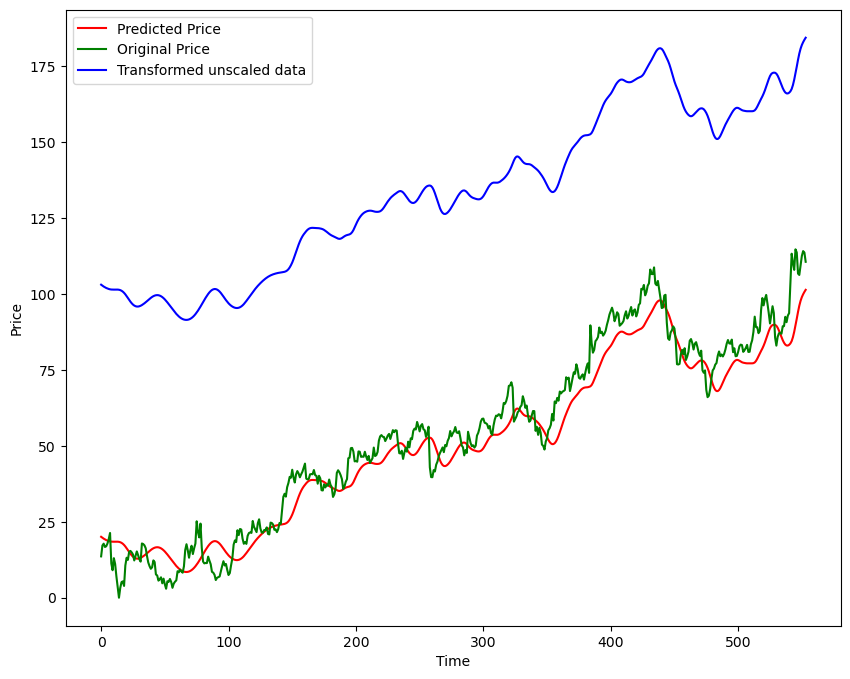

In [68]:
plt.figure(figsize=(10,8))
plt.plot(y_predict_converted , 'r' , label="Predicted Price")
plt.plot(y_converted , 'g' , label = "Original Price")
plt.plot(y_predict_converted_1 , 'b' , label = "Transformed unscaled data")
plt.xlabel("Time")
plt.ylabel("Price")
plt.legend()
plt.show()

In [65]:
model.save('Stock Predictions Model.keras')